<a href="https://colab.research.google.com/github/Juanchp00/Teor-a-de-se-ales/blob/Juanchp00-practica/Ejercicio_probabilidad%20error%20interact_Juan_Jos%C3%A9_Chamorro_Paz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio probabilidad simbolos 
Juan José Chamorro Paz

In [13]:
from sympy.solvers import solve_linear_system
from sympy import Symbol
import numpy as np
import sympy as sp
import seaborn as sns
from sympy.solvers import solve
from sympy.matrices import Matrix
from matplotlib import pyplot as plt
from scipy.signal import square, sawtooth
from matplotlib import pyplot as plt
from scipy.signal import lti
from scipy.signal import butter
from scipy.signal import filtfilt, find_peaks
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import hilbert
from scipy.integrate import cumtrapz
from scipy import signal
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 6)
matplotlib.rcParams['figure.dpi'] = 90
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interact 
from sympy.solvers import solve_linear_system 
from sympy import Symbol 
import sympy as sym 
from sympy.matrices import Matrix #Trabajo con matrices
from scipy.signal import lti, convolve, correlate, hilbert, butter, filtfilt
import plotly.graph_objects as go
from scipy.fftpack import fft, fftfreq, fftshift, ifft
import random

In [33]:
tamaño=(2**16)-1
secuencia=np.zeros(tamaño)

secuencia=np.array([1]*60000+[-1]*5535)
random.shuffle(secuencia)

dato1=0
dato2=0
datos=np.zeros(2)
"""
for i in range (0,tamaño):
  secuencia[i]=random.randint(0,1)
  if (secuencia[i]==0):
    secuencia[i]=-1
    dato2=dato2+1

dato1=tamaño-dato2

datos[0]=dato1
datos[1]=dato2
"""
datos[0]=60000
datos[1]=5535

mensaje=secuencia

In [34]:
print(datos[0],datos[1])

60000.0 5535.0


(0.0, 1000.0)

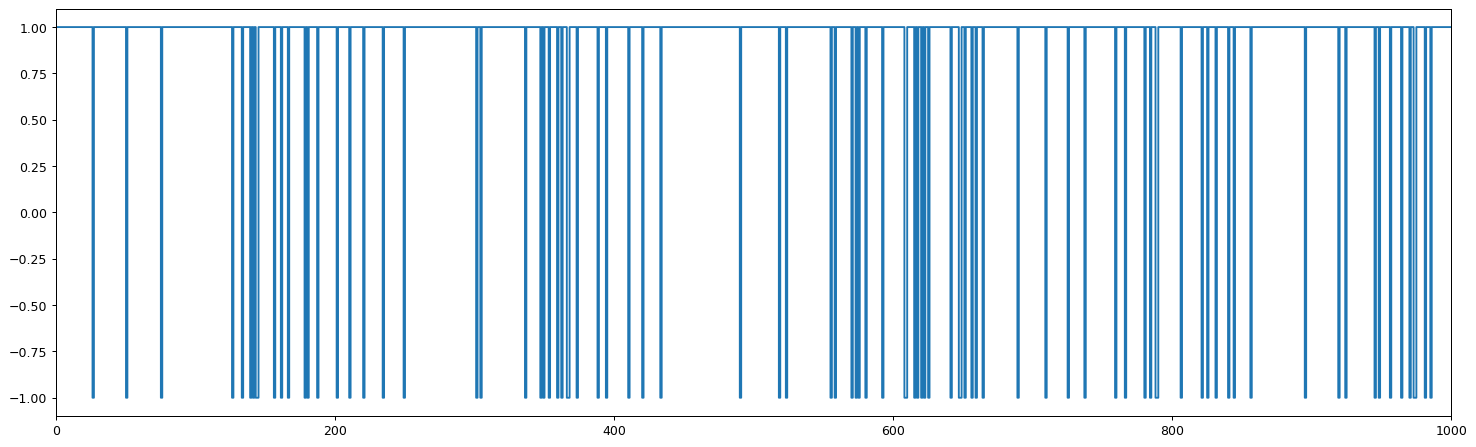

In [36]:
plt.step(range(tamaño), secuencia, '-')
plt.xlim(0,1000)

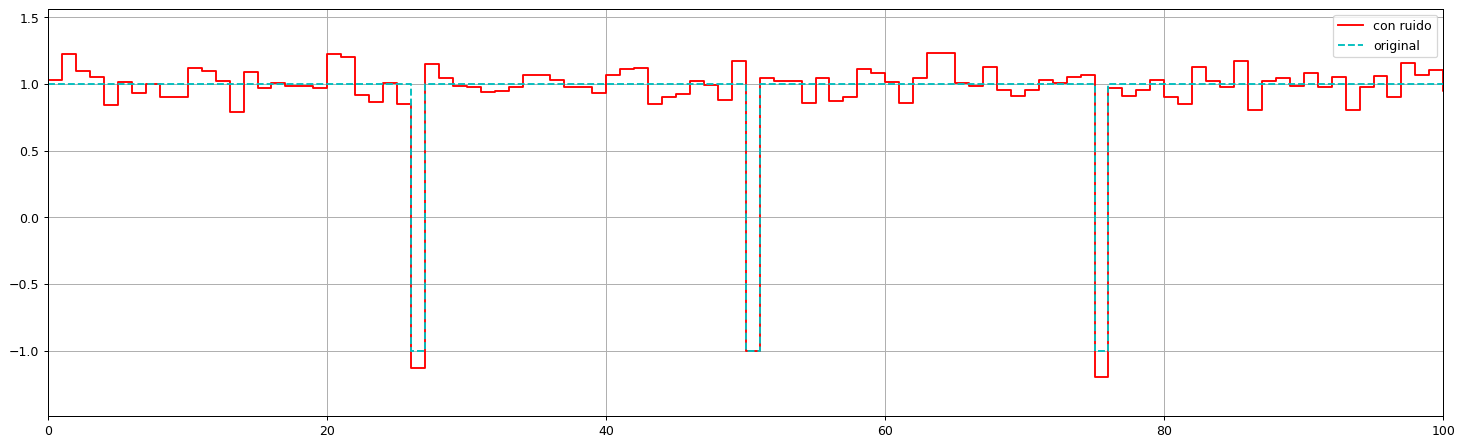

In [38]:
secuencia = secuencia.astype('float')

secuenciap=secuencia.copy()
symbol1 = secuenciap[secuenciap==1]
noise1 = np.random.normal(0, 0.1, size=symbol1.size)
secuenciap[secuenciap==1] = symbol1 + noise1

symbol2 = secuenciap[secuenciap==-1]
noise2 = np.random.normal(0, 0.1, size=symbol2.size)
secuenciap[secuenciap==-1] = symbol2 + noise2

plt.xlim(0,100)
plt.step(range(tamaño),secuenciap, C='red', label='con ruido')
plt.step(range(tamaño),secuencia,'--', C='C', label='original')
plt.legend()
plt.grid()


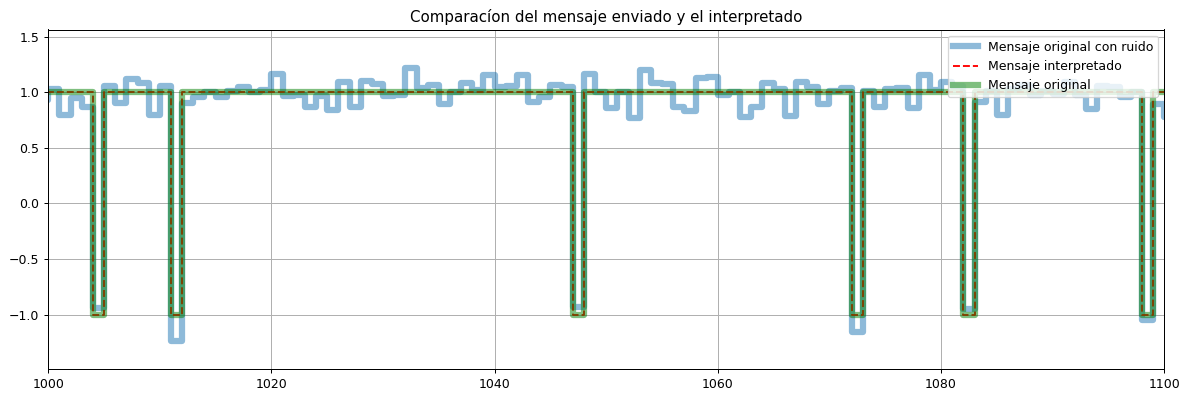

In [39]:
d_a=[]#señal interpretada vacía
for j in secuenciap.reshape(secuenciap.shape[0],-1):
    if np.sum((j-(mensaje.min()))**2) > np.sum((j-(mensaje.max()))**2):#comparación de grado de parecido con cada simbolo para la toma de decisión posterior
        d_a.append(mensaje.max())
    else:
        d_a.append(mensaje.min())

ms_orig=secuenciap[::1] 
plt.figure(figsize=(16,5),dpi=90)
plt.title('Comparacíon del mensaje enviado y el interpretado')
plt.step(range(len(ms_orig)),ms_orig,linewidth=5,alpha=0.5,label='Mensaje original con ruido')
plt.step(range(len(d_a)),d_a,'--',color='red',label='Mensaje interpretado')
plt.step(range(tamaño),secuencia,linewidth=5,alpha=0.5, color='green', label='Mensaje original')
plt.xlim(1000,1100)
plt.legend(loc=1)
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



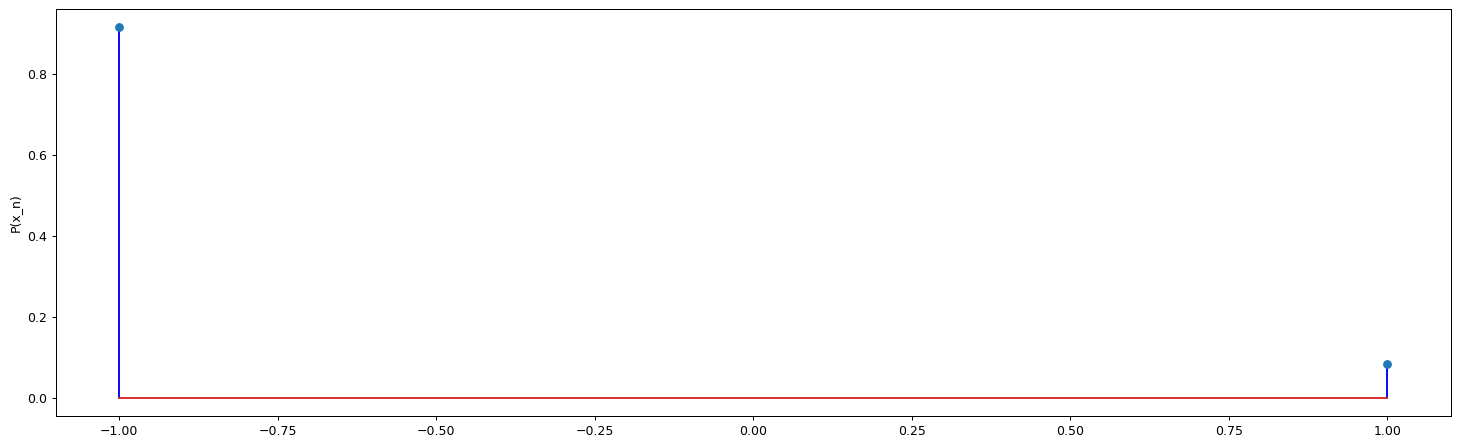

In [40]:
#Probabilidad marginal
proba=np.zeros(2)

proba[0]=datos[0]/tamaño
proba[1]=datos[1]/tamaño

x=np.array([-1,1])

plt.stem(x,proba,'b')
plt.ylabel('P(x_n)')
plt.show()

In [41]:
#cuantos 1 y -1 detectó 
prueba=np.zeros(tamaño)
for i in range (0, tamaño):
  prueba[i]=d_a[i]


unos=prueba[prueba==prueba.max()]
len(unos)

ceros=prueba[prueba==prueba.min()]
len(ceros)

5535

In [42]:
peu=np.abs((datos[0]-len(unos))/datos[0])
pec=np.abs((datos[1]-len(ceros))/datos[1])

pe=(proba[0]*peu)+(proba[1]*pec)
pe

0.0

#prueba

In [43]:
from ipywidgets import interact,IntSlider

def pltbase(n=1):
  #secuencia = secuencia.astype('float')

  secuenciapp=secuencia.copy()
  symbol1p = secuenciap[secuenciapp==1]
  noise1p = np.random.normal(0, n, size=symbol1p.size)
  secuenciapp[secuenciapp==1] = symbol1p + noise1p

  symbol2p = secuenciapp[secuenciapp==-1]
  noise2p = np.random.normal(0, n, size=symbol2.size)
  secuenciapp[secuenciapp==-1] = symbol2p + noise2p

  """
  plt.xlim(0,100)
  plt.plot(range(tamaño),secuenciapp, C='red', label='con ruido')
  plt.plot(range(tamaño),secuencia,'--', C='C', label='original')
  plt.legend()
  plt.grid()
  """

  d_ap=[]#señal interpretada vacía
  for j in secuenciapp.reshape(secuenciapp.shape[0],-1):
    if np.sum((j-(mensaje.min()))**2) > np.sum((j-(mensaje.max()))**2):#comparación de grado de parecido con cada simbolo para la toma de decisión posterior
      d_ap.append(mensaje.max())
    else:
      d_ap.append(mensaje.min())
######
  #cuantos 1 y -1 detectó 
  pruebap=np.zeros(tamaño)
  for i in range (0, tamaño):
    pruebap[i]=d_ap[i]


  unosp=pruebap[pruebap==pruebap.max()]
  cerosp=pruebap[pruebap==pruebap.min()]

  peup=np.abs((datos[0]-len(unosp))/datos[0])
  pecp=np.abs((datos[1]-len(cerosp))/datos[1])

  pep=(proba[0]*peup)+(proba[1]*pecp)
#######
  ms_origp=secuenciapp[::1] 
  plt.figure(figsize=(16,5),dpi=90)
  plt.title('Comparacíon del mensaje enviado y el interpretado, Pe = %.1f %%' % (100*pep))
  plt.step(range(len(ms_origp)),ms_origp,linewidth=5,alpha=0.5,label='Mensaje original con ruido')
  plt.step(range(len(d_ap)),d_ap,'--',color='red',label='Mensaje interpretado')
  plt.step(range(tamaño),secuencia,linewidth=5,alpha=0.5, color='green', label='Mensaje original')
  plt.xlim(0,100)
  plt.legend(loc=1)
  plt.grid()

  return

interact(pltbase,n=(0.1,0.9,0.1))

interactive(children=(FloatSlider(value=0.9, description='n', max=0.9, min=0.1), Output()), _dom_classes=('wid…

<function __main__.pltbase>

In [23]:
#probabilidad codicional y conjunta
"""
lista=np.zeros((len(x),len(x)))
simbolos=[-1,1]

proconj=[]
PC=np.zeros((2,2))##probabilidad condicional
PJ=np.zeros((2,2))##probabilidad conjunta

for i in simbolos: 
  proconj.append([int(a ==i) for a in secuencia])

for j in range (0, len(simbolos)):
   for k in range (0, len(simbolos)):   
    hist1,_,_=np.histogram2d(proconj[j], proconj[k], density=True)
    hist1=hist1/np.sum(hist1)
    pcond=hist1/hist1.sum(axis=0) ##probabilidad condicional

    PJ[j,k]=hist1[-1,0]
    PC[j,k]=pcond[-1,0]

PC[PC==0]=1
"""

'\nlista=np.zeros((len(x),len(x)))\nsimbolos=[-1,1]\n\nproconj=[]\nPC=np.zeros((2,2))##probabilidad condicional\nPJ=np.zeros((2,2))##probabilidad conjunta\n\nfor i in simbolos: \n  proconj.append([int(a ==i) for a in secuencia])\n\nfor j in range (0, len(simbolos)):\n   for k in range (0, len(simbolos)):   \n    hist1,_,_=np.histogram2d(proconj[j], proconj[k], density=True)\n    hist1=hist1/np.sum(hist1)\n    pcond=hist1/hist1.sum(axis=0) ##probabilidad condicional\n\n    PJ[j,k]=hist1[-1,0]\n    PC[j,k]=pcond[-1,0]\n\nPC[PC==0]=1\n'

In [24]:
#hist1,_,_=np.histogram2d(proconj[0], proconj[0], density=True)
#plt.matshow(hist1)